In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [36]:
Excel=pd.ExcelFile("Datos/practica1Avanzado.xlsx")

In [37]:
Excel.sheet_names

['Hoja1',
 'Voltaje',
 'Exp_Voltaje_VS_Conteos',
 'intensidad',
 'Hoja2',
 'Conteos_intensidad']

In [38]:
datos=pd.read_excel(Excel,sheet_name='Exp_Voltaje_VS_Conteos')

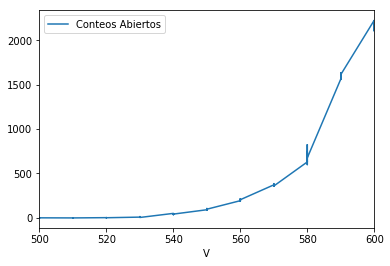

In [40]:
datos.plot(x="V",y="Conteos Abiertos",kind="line")

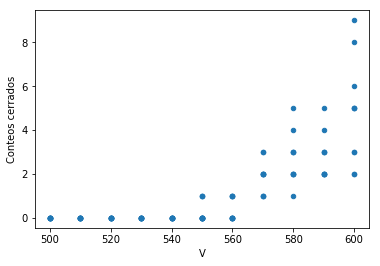

In [41]:
datos.plot(x="V",y="Conteos cerrados",kind="scatter")

In [45]:
STD_datos=datos.groupby("V").std()
STD_datos=STD_datos.reset_index()

In [46]:
Promedios_datos=datos.groupby("V").mean()
Promedios_datos=Promedios_datos.reset_index()

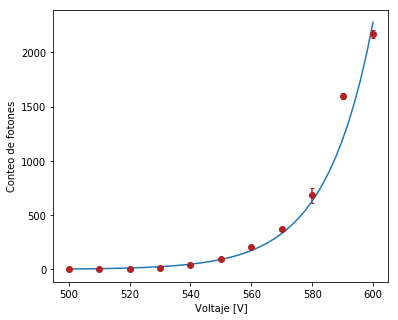

In [79]:
plt.figure(figsize=(6,5))
#plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
 #            color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick')
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             capsize=2,fmt="o",color="firebrick")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
x=np.linspace(500,600)
plt.plot(x,4*10**(-14)*np.exp(0.0643*x))
plt.show()

In [60]:
def model(x,a,b):
    return a*np.exp(b*x)
    #return a*np.exp(b*x)+c

In [82]:
x_obs=np.array(Promedios_datos["V"])
y_obs=np.array(Promedios_datos["Conteos Abiertos"])
sigma_y_obs=np.array(STD_datos["Conteos Abiertos"])

In [83]:
ajuste=[4*10**(-14),0.0643]

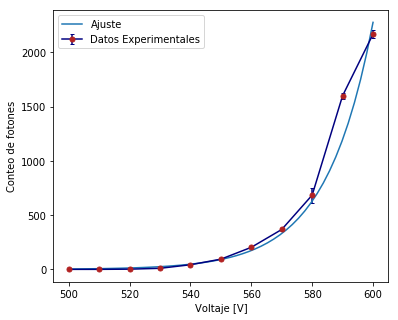

In [86]:
plt.figure(figsize=(6,5))
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick',label="Datos Experimentales")
#plt.errorbar(x_obs,y_obs,yerr=sigma_y_obs,capsize=2,fmt="o",color="firebrick")
plt.plot(x,model(x,ajuste[0],ajuste[1]),label="Ajuste")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
plt.legend()
plt.show()